In [13]:
import numpy as np
import matplotlib.pyplot as plt

# setup animation
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')


# to read an image from a url (io) and convert it to grayscale (color)
from skimage import io,color
# convolution
from scipy.signal import convolve2d


import pandas as pd

In [25]:
imgN  = 20
image = np.random.randn(imgN, imgN)

kernelN = 7
Y, X = np.meshgrid(np.linspace(-3, 3, kernelN), np.linspace(-3, 3, kernelN))
kernel  = np.exp(-(X**2 + Y**2) / 7 )
kernel  = kernel / np.sum(kernel)

In [27]:
halfKr = kernelN//2
convoutput = np.zeros((imgN+kernelN-1,imgN+kernelN-1))

imagePad = np.zeros(convoutput.shape)
imagePad[halfKr:-halfKr:1,halfKr:-halfKr:1] = image


# double for-loop over rows and columns (width and height of picture)
for rowi in range(halfKr,imgN+halfKr):
  for coli in range(halfKr,imgN+halfKr):

    # cut out a piece of the image
    pieceOfImg = imagePad[rowi-halfKr:rowi+halfKr+1:1,coli-halfKr:coli+halfKr+1:1]

    #print(pieceOfImg.shape, kernel.shape)
    # dot product: element-wise multiply and sum
    dotprod = np.sum( pieceOfImg*kernel )

    # store the result for this pixel
    convoutput[rowi,coli] = dotprod


# trim off edges
convoutput = convoutput[halfKr:-halfKr:1,halfKr:-halfKr:1]

In [28]:
convoutput2 = convolve2d(image,kernel,mode='same')

Text(0.5, 1.0, "Scipy's convolution")

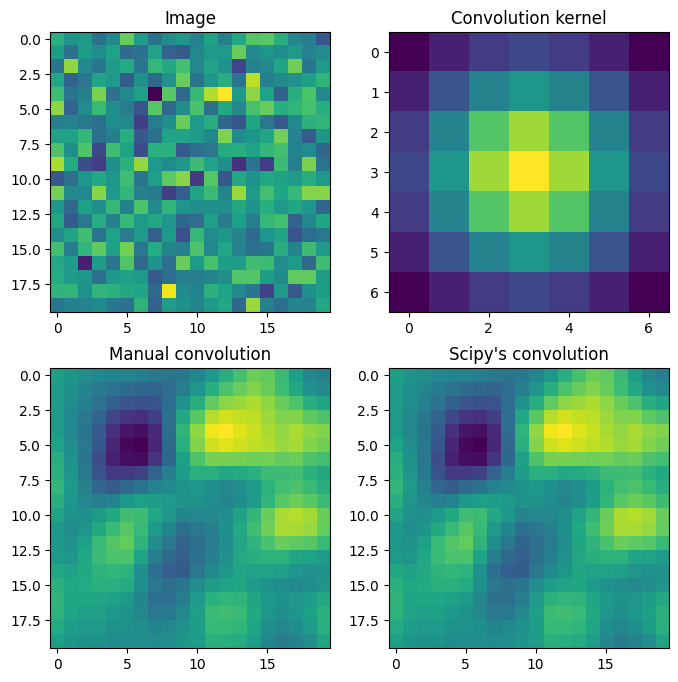

In [29]:
fig,ax = plt.subplots(2,2,figsize=(8,8))

ax[0,0].imshow(image)
ax[0,0].set_title('Image')

ax[0,1].imshow(kernel)
ax[0,1].set_title('Convolution kernel')

ax[1,0].imshow(convoutput)
ax[1,0].set_title('Manual convolution')

ax[1,1].imshow(convoutput2)
ax[1,1].set_title("Scipy's convolution")